<a href="https://colab.research.google.com/github/maryantonopoulou/teliki_ergasia_EDDE2/blob/main/sentiment_analysis%2C_%CF%84%CE%B5%CE%BB%CE%B9%CE%BA%CE%AE_%CE%B5%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 11.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
paradf=pd.read_csv('/content/gdrive/MyDrive/CSVFILES/filtered_ergatikaparapolitika.csv')
avdf=pd.read_csv('/content/gdrive/MyDrive/CSVFILES/filtered_ergatikaathensvoice.csv')
nbdf=pd.read_csv('/content/gdrive/MyDrive/CSVFILES/filtered_ergatikanewsbomb.csv')
ktdf=pd.read_csv('/content/gdrive/MyDrive/CSVFILES/filtered_ergatikakathimerini.csv')
nfdf=pd.read_csv('/content/gdrive/MyDrive/CSVFILES/filtered_ergatikanaftemboriki.csv')

In [ ]:
combined_df = pd.concat([paradf, avdf,nbdf,ktdf,nfdf] ,ignore_index=True)

In [ ]:
len(combined_df)

747

In [ ]:
short_combined_df=combined_df[['date','full_text' ]]
short_combined_df = short_combined_df.rename(columns={'full_text': 'text'} )

In [ ]:
short_combined_df.tail(5)

,date,text
742,2016-06-13,Νεκρός σε εργατικό ατύχημα τεχνικός του ΔΕΔΔΗΕ...
743,2016-06-01,Εργατικό ατύχημα με θύμα εργαζόμενο σε υπηρεσί...
744,2016-05-16,Εργατικό ατύχημα στο Ηράκλειο Κρήτης με τέσσερ...
745,2015-10-29,Θανατηφόρο εργατικό ατύχημα στο ορυχείο Μαυροπ...
746,2015-03-28,Ηράκλειο: Υπέκυψε 42χρονος μετά από εργατικό α...


In [ ]:
short_combined_df.dtypes

,0
date,object
text,object


In [ ]:
short_combined_df['date'] = pd.to_datetime(short_combined_df['date'], format='%Y-%m-%d')

In [ ]:
short_combined_df.dtypes

,0
date,datetime64[ns]
text,object


In [ ]:
short_combined_df['text']=short_combined_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
emolex_df['word'].head(5)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας
3,εχω
4,οριο


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_combined_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(747, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

#λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

#anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

#λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

#λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

#λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

#λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
negative_words

,word
6,υδρα
9,απατσι
17,γαιδαρος
20,γιαννης
27,δευτερα παρουσια
...,...
13147,αλιμονο
13148,επιδεινωνεται
13152,κατειργασμενος
13155,κιτρινιζω


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,2
1,2
2,0
3,0
4,1
...,...
742,4
743,3
744,2
745,3


In [ ]:
short_combined_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_combined_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_combined_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_combined_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_combined_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_combined_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_combined_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_combined_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_combined_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_combined_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_combined_df.head(4)

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2018-09-13,Εργατικό ατύχημα στην Πυλαία Μάχη για τη ζωή τ...,2,2,1,1,1,2,2,1,2,3
1,2018-03-21,Εργατικό ατύχημα στην Κνωσό Σε σοβαρή κατάστασ...,2,0,0,1,2,2,0,3,2,4
2,2017-08-31,Εργατικό ατύχημα στην Ελευσίνα Λιμενεργάτης τρ...,1,2,0,1,1,0,1,1,1,2
3,2021-11-25,Ο Γολγοθάς της σύνταξης μετά το εργατικό ατύχη...,1,0,0,1,1,0,0,1,1,1


In [ ]:
short_combined_df.reset_index(inplace=True)
short_combined_df.set_index('date', inplace=True)
short_combined_df.head(4)

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2018-09-13,0,Εργατικό ατύχημα στην Πυλαία Μάχη για τη ζωή τ...,2,2,1,1,1,2,2,1,2,3
2018-03-21,1,Εργατικό ατύχημα στην Κνωσό Σε σοβαρή κατάστασ...,2,0,0,1,2,2,0,3,2,4
2017-08-31,2,Εργατικό ατύχημα στην Ελευσίνα Λιμενεργάτης τρ...,1,2,0,1,1,0,1,1,1,2
2021-11-25,3,Ο Γολγοθάς της σύνταξης μετά το εργατικό ατύχη...,1,0,0,1,1,0,0,1,1,1


Μετράμε τον μ.ο. του αριθμού των λέξεων ανά ημέρα

<Axes: xlabel='date'>

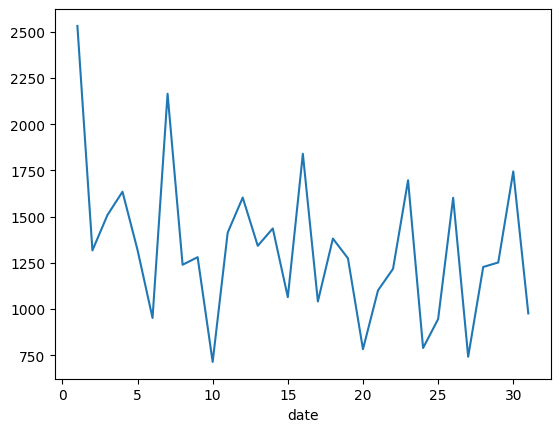

In [ ]:
short_combined_df['text'].str.len().groupby(by=short_combined_df.index.day).mean().plot()

<ipython-input-29-4175775941>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_combined_df['text'].str.len().resample('M').mean().plot() #ανα μήνα


<Axes: xlabel='date'>

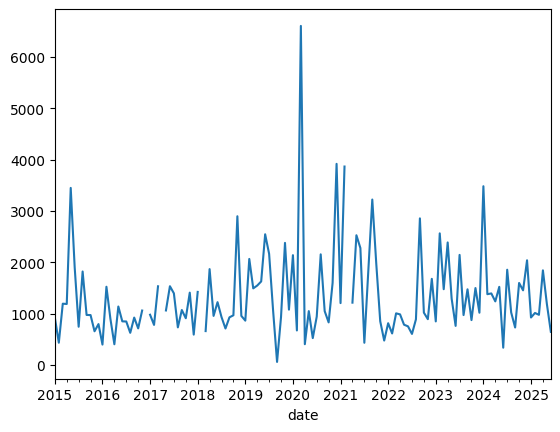

In [ ]:
short_combined_df['text'].str.len().resample('M').mean().plot() #ανα μήνα

Πλήθος άρθρων ανά έτος

<ipython-input-30-3801114220>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['text'].resample('Y').count().plot(kind='barh')


<Axes: ylabel='date'>

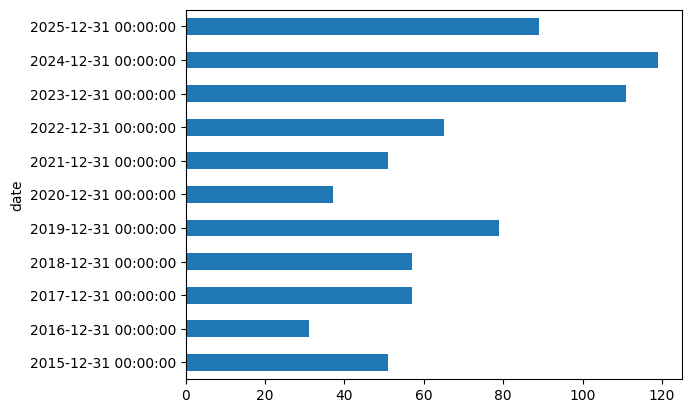

In [ ]:
short_combined_df['text'].resample('Y').count().plot(kind='barh')

<ipython-input-31-173677338>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['positive'].resample('Y').mean().plot() # Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά έτος


<Axes: xlabel='date'>

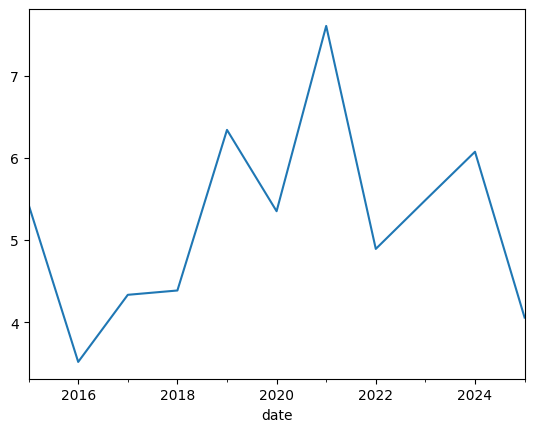

In [ ]:
short_combined_df['positive'].resample('Y').mean().plot() # Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά έτος

<ipython-input-32-254854648>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['negative'].resample('Y').sum().plot(color = 'b',label = 'neg').legend()


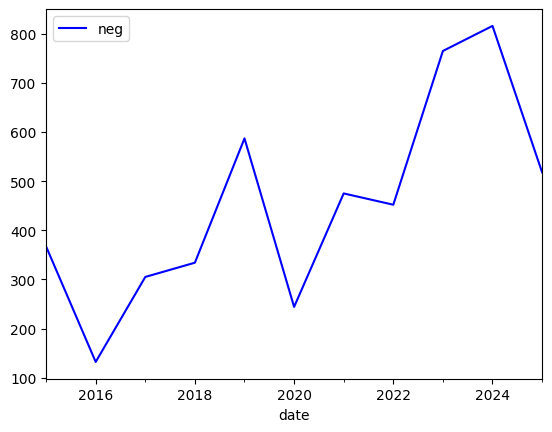

In [ ]:
short_combined_df['negative'].resample('Y').sum().plot(color = 'b',label = 'neg').legend()

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-34-1601138828>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax = short_combined_df['anger'].resample('Y').sum().plot(figsize=(16,4), color = 'darkred', label='Θυμός')
<ipython-input-34-1601138828>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['joy'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'darkorange', label='Χαρά')
<ipython-input-34-1601138828>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['disgust'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'magenta', label='Απέχθεια')
<ipython-input-34-1601138828>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['surprise'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'teal', label='Έκπληξη')
<ipython-input-34

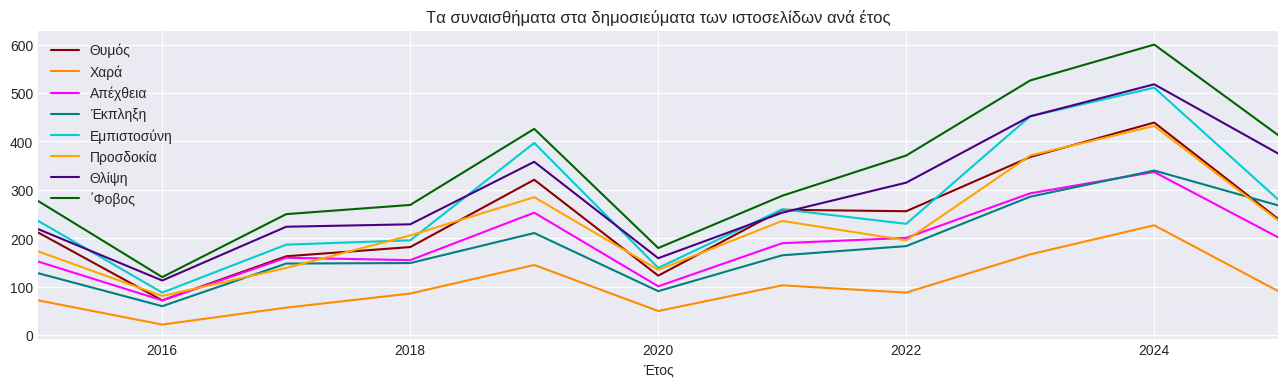

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

ax = short_combined_df['anger'].resample('Y').sum().plot(figsize=(16,4), color = 'darkred', label='Θυμός')
short_combined_df['joy'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'darkorange', label='Χαρά')
short_combined_df['disgust'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'magenta', label='Απέχθεια')
short_combined_df['surprise'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'teal', label='Έκπληξη')
short_combined_df['trust'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'darkturquoise', label='Εμπιστοσύνη')
short_combined_df['anticipation'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'orange', label='Προσδοκία')
short_combined_df['sadness'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'indigo', label='Θλίψη')
short_combined_df['fear'].resample('Y').sum().plot(figsize=(16,4), ax = ax, color = 'darkgreen', label='΄Φοβος')

plt.xlabel('Έτος')
plt.ylabel('')
plt.title('Tα συναισθήματα στα δημοσιεύματα των ιστοσελίδων ανά έτος') # τίτλος
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(short_combined_df.index.min())

2015-01-14 00:00:00


In [ ]:
print(short_combined_df.loc['2024', ['positive', 'negative', 'anger', 'joy', 'disgust', 'surprise', 'trust', 'anticipation', 'sadness', 'fear']].sum())

positive        723
negative        816
anger           439
joy             227
disgust         337
surprise        340
trust           511
anticipation    432
sadness         518
fear            600
dtype: int64


<ipython-input-37-2623081916>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  anger_yearly_sum = short_combined_df['anger'].resample('Y').sum()


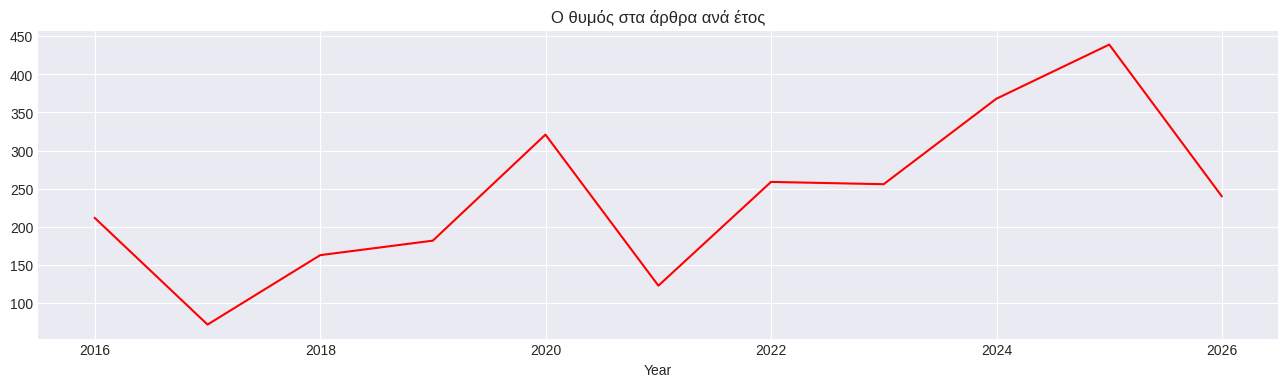

In [ ]:
import matplotlib.pyplot as plt


anger_yearly_sum = short_combined_df['anger'].resample('Y').sum()


plt.figure(figsize=(16, 4))
plt.plot(anger_yearly_sum.index, anger_yearly_sum.values, color='red')
plt.xlabel('Year')
plt.ylabel('')
plt.title('O θυμός στα άρθρα ανά έτος')
plt.show()

<ipython-input-38-3766446699>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  fear_yearly_sum = short_combined_df['fear'].resample('Y').sum()


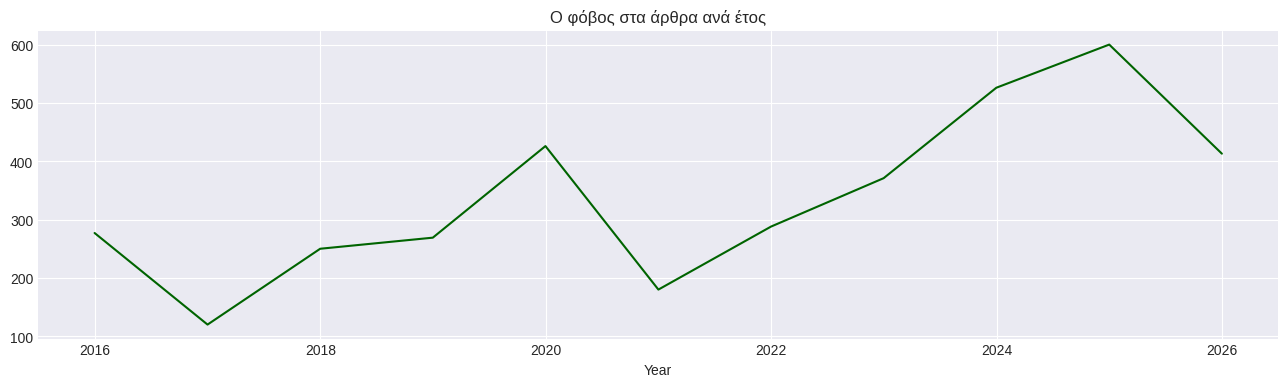

In [ ]:
import matplotlib.pyplot as plt


fear_yearly_sum = short_combined_df['fear'].resample('Y').sum()


plt.figure(figsize=(16, 4))
plt.plot(fear_yearly_sum.index, fear_yearly_sum.values, color='darkgreen')
plt.xlabel('Year')
plt.ylabel('')
plt.title('O φόβος στα άρθρα ανά έτος')
plt.show()

<ipython-input-39-3059811737>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  fear_yearly_sum = short_combined_df['sadness'].resample('Y').sum()


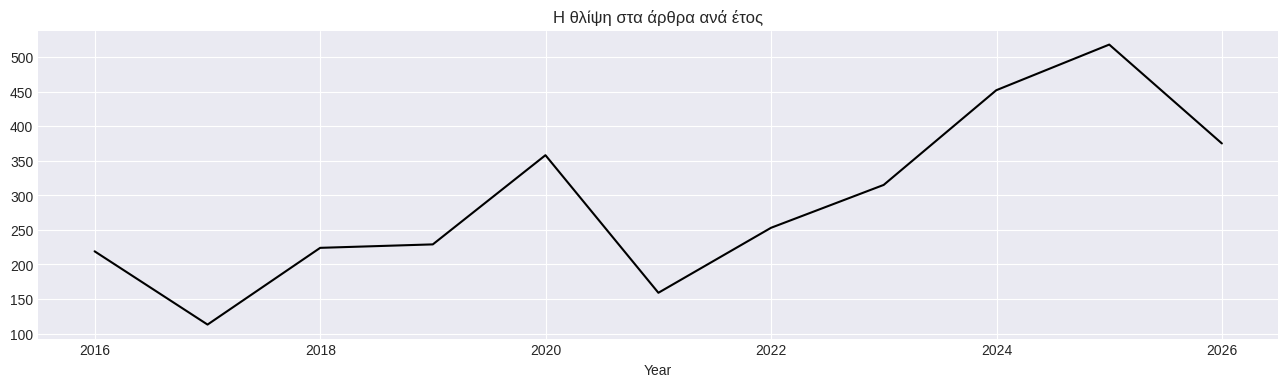

In [ ]:
import matplotlib.pyplot as plt

fear_yearly_sum = short_combined_df['sadness'].resample('Y').sum()


plt.figure(figsize=(16, 4))
plt.plot(fear_yearly_sum.index, fear_yearly_sum.values, color='black')
plt.xlabel('Year')
plt.ylabel('')
plt.title('Η θλίψη στα άρθρα ανά έτος')
plt.show()

<ipython-input-40-3059811737>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  fear_yearly_sum = short_combined_df['sadness'].resample('Y').sum()


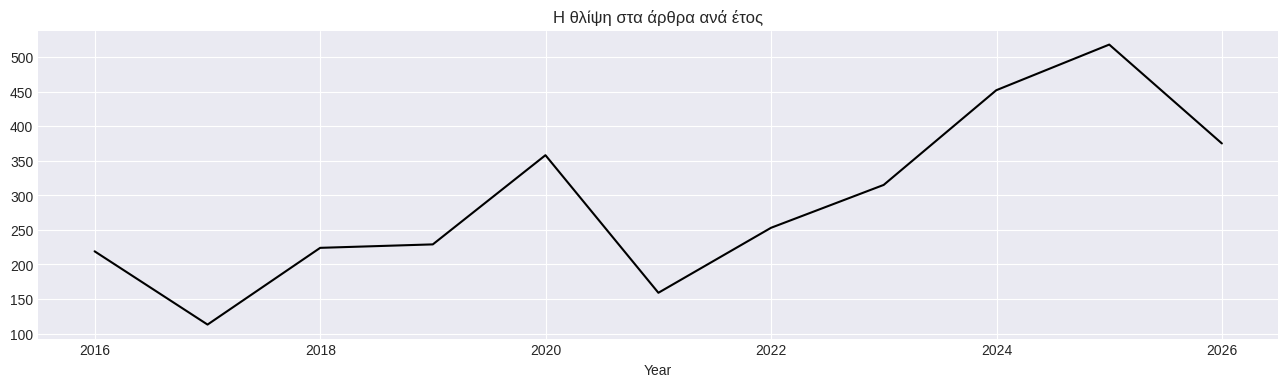

In [ ]:
import matplotlib.pyplot as plt


fear_yearly_sum = short_combined_df['sadness'].resample('Y').sum()

plt.figure(figsize=(16, 4))
plt.plot(fear_yearly_sum.index, fear_yearly_sum.values, color='black')
plt.xlabel('Year')
plt.ylabel('')
plt.title('Η θλίψη στα άρθρα ανά έτος')
plt.show()

<ipython-input-41-3518242351>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_emotion_sum_2024 = df_2020[['trust', 'fear', 'sadness', 'joy', 'anger', 'disgust', 'anticipation', 'surprise']].resample('M').sum()


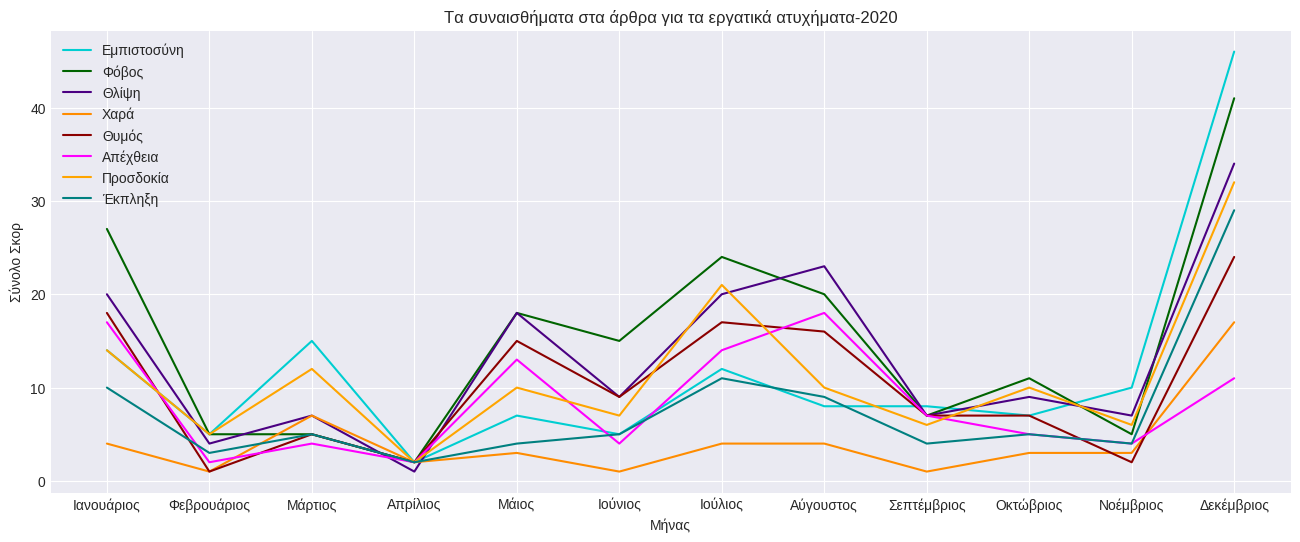

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# για το  2020
df_2020 = short_combined_df.loc['2020']


monthly_emotion_sum_2024 = df_2020[['trust', 'fear', 'sadness', 'joy', 'anger', 'disgust', 'anticipation', 'surprise']].resample('M').sum()


greek_month_names = [
    'Ιανουάριος', 'Φεβρουάριος', 'Μάρτιος', 'Απρίλιος', 'Μάιος', 'Ιούνιος',
    'Ιούλιος', 'Αύγουστος', 'Σεπτέμβριος', 'Οκτώβριος', 'Νοέμβριος', 'Δεκέμβριος'
]


month_numbers = monthly_emotion_sum_2024.index.month


greek_month_labels = [greek_month_names[month - 1] for month in month_numbers]


plt.figure(figsize=(16, 6))

plt.plot(greek_month_labels, monthly_emotion_sum_2024['trust'], label='Εμπιστοσύνη', color = 'darkturquoise')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['fear'], label='Φόβος', color = 'darkgreen')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['sadness'], label='Θλίψη', color = 'indigo')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['joy'], label='Χαρά', color = 'darkorange')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['anger'], label='Θυμός', color = 'darkred')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['disgust'], label='Απέχθεια', color = 'magenta')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['anticipation'], label='Προσδοκία', color = 'orange')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['surprise'], label='Έκπληξη', color = 'teal')


plt.xlabel('Μήνας')
plt.ylabel('Σύνολο Σκορ')
plt.title('Tα συναισθήματα στα άρθρα για τα εργατικά ατυχήματα-2020')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-48-2922910108>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_emotion_sum_2024 = df_2018[['trust', 'fear', 'sadness', 'joy', 'anger', 'disgust', 'anticipation', 'surprise']].resample('M').sum()


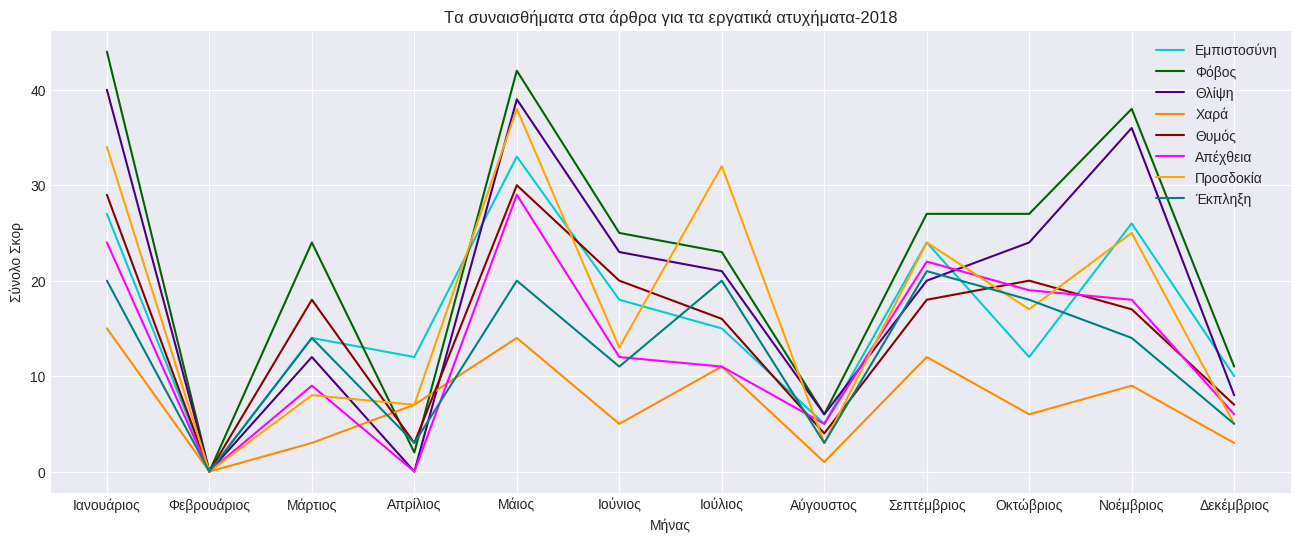

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# για το  2018
df_2018 = short_combined_df.loc['2018']


monthly_emotion_sum_2024 = df_2018[['trust', 'fear', 'sadness', 'joy', 'anger', 'disgust', 'anticipation', 'surprise']].resample('M').sum()


greek_month_names = [
    'Ιανουάριος', 'Φεβρουάριος', 'Μάρτιος', 'Απρίλιος', 'Μάιος', 'Ιούνιος',
    'Ιούλιος', 'Αύγουστος', 'Σεπτέμβριος', 'Οκτώβριος', 'Νοέμβριος', 'Δεκέμβριος'
]


month_numbers = monthly_emotion_sum_2024.index.month


greek_month_labels = [greek_month_names[month - 1] for month in month_numbers]


plt.figure(figsize=(16, 6))

plt.plot(greek_month_labels, monthly_emotion_sum_2024['trust'], label='Εμπιστοσύνη', color = 'darkturquoise')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['fear'], label='Φόβος', color = 'darkgreen')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['sadness'], label='Θλίψη', color = 'indigo')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['joy'], label='Χαρά', color = 'darkorange')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['anger'], label='Θυμός', color = 'darkred')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['disgust'], label='Απέχθεια', color = 'magenta')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['anticipation'], label='Προσδοκία', color = 'orange')
plt.plot(greek_month_labels, monthly_emotion_sum_2024['surprise'], label='Έκπληξη', color = 'teal')


plt.xlabel('Μήνας')
plt.ylabel('Σύνολο Σκορ')
plt.title('Tα συναισθήματα στα άρθρα για τα εργατικά ατυχήματα-2018')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-42-2123294786>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['pos/neg'].resample('Y').mean().plot(figsize=(16,4), color='purple')


<Axes: xlabel='date'>

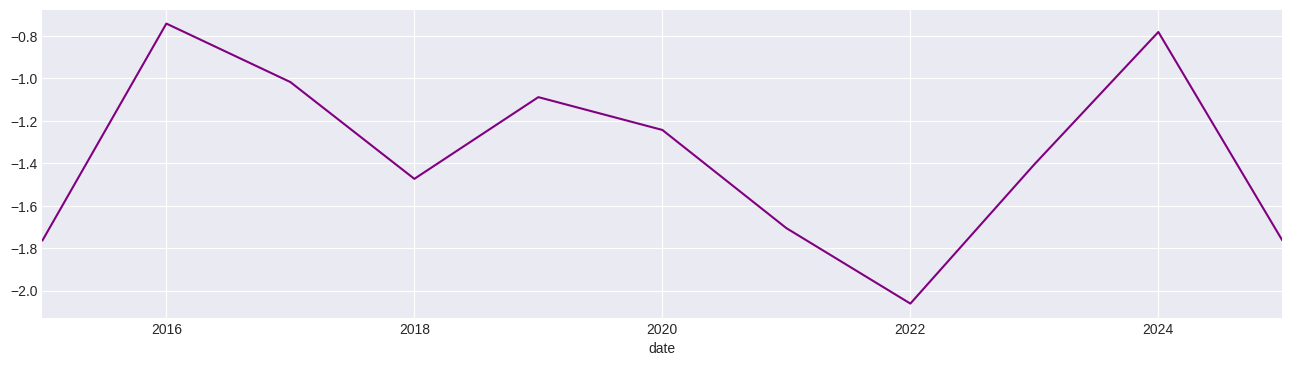

In [ ]:
short_combined_df['pos/neg'] = short_combined_df['positive'] - short_combined_df['negative']
short_combined_df['pos/neg'].resample('Y').mean().plot(figsize=(16,4), color='purple')

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<ipython-input-44-2623223414>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean().plot(kind='bar',
<ipython-input-44-2623223414>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  color=(short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean()>0


<Axes: xlabel='date'>

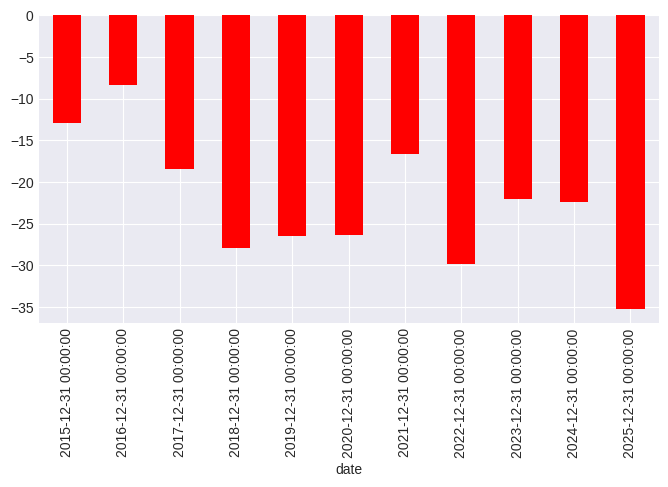

In [ ]:
short_combined_df['(-)αρνητικότητα | θετικότητα(+)'] = short_combined_df.positive*100//short_combined_df[['positive','negative']].sum(axis=1) - short_combined_df.negative*100//short_combined_df[['positive','negative']].sum(axis=1)

short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean().plot(kind='bar',
                                                                               color=(short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
yearly_sentiment = short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean()
print(yearly_sentiment)

date
2015-12-31   -12.921569
2016-12-31    -8.354839
2017-12-31   -18.491228
2018-12-31   -27.912281
2019-12-31   -26.459459
2020-12-31   -26.416667
2021-12-31   -16.632653
2022-12-31   -29.830769
2023-12-31   -22.055556
2024-12-31   -22.364407
2025-12-31   -35.197674
Freq: YE-DEC, Name: (-)αρνητικότητα | θετικότητα(+), dtype: float64


<ipython-input-45-1969296277>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sentiment = short_combined_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean()


<ipython-input-49-2025419751>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['(-)αρνητικότητα | θετικότητα(+)'] = df_2020.positive*100//df_2020[['positive','negative']].sum(axis=1) - df_2020.negative*100//df_2020[['positive','negative']].sum(axis=1)
<ipython-input-49-2025419751>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment_2020 = df_2020['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()


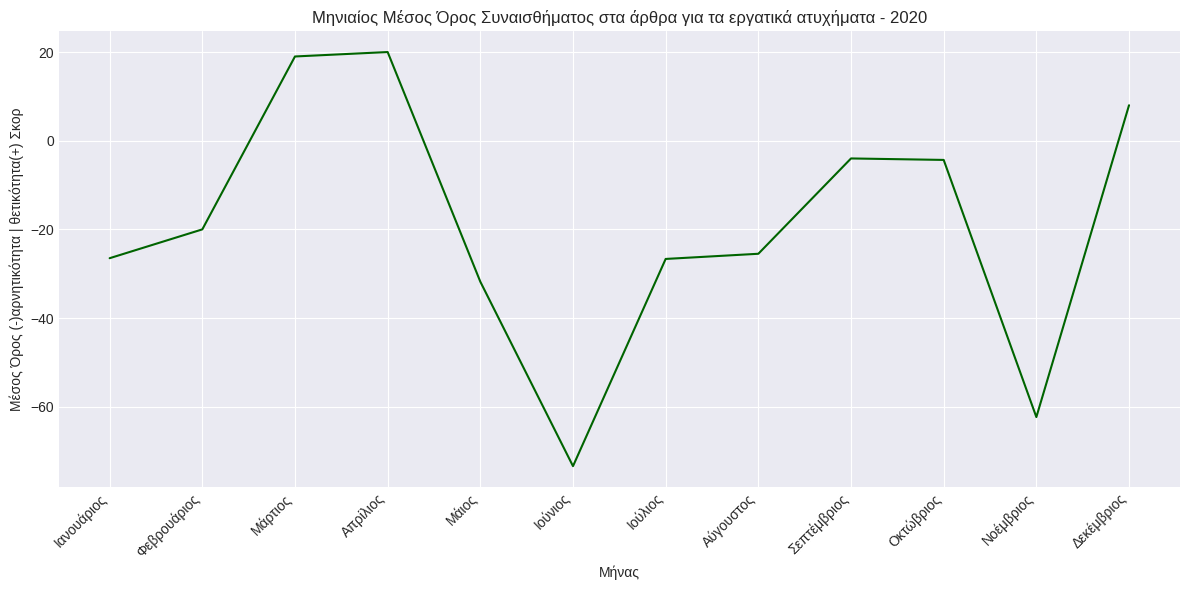

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# για 2020
df_2020 = short_combined_df.loc['2020']

df_2020['(-)αρνητικότητα | θετικότητα(+)'] = df_2020.positive*100//df_2020[['positive','negative']].sum(axis=1) - df_2020.negative*100//df_2020[['positive','negative']].sum(axis=1)


monthly_sentiment_2020 = df_2020['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()


greek_month_names = [
    'Ιανουάριος', 'Φεβρουάριος', 'Μάρτιος', 'Απρίλιος', 'Μάιος', 'Ιούνιος',
    'Ιούλιος', 'Αύγουστος', 'Σεπτέμβριος', 'Οκτώβριος', 'Νοέμβριος', 'Δεκέμβριος'
]

month_numbers = monthly_sentiment_2020.index.month


greek_month_labels = [greek_month_names[month - 1] for month in month_numbers]


plt.figure(figsize=(12, 6))
plt.plot(greek_month_labels, monthly_sentiment_2020.values, color='darkgreen')
plt.xlabel('Μήνας')
plt.ylabel('Μέσος Όρος (-)αρνητικότητα | θετικότητα(+) Σκορ')
plt.title('Μηνιαίος Μέσος Όρος Συναισθήματος στα άρθρα για τα εργατικά ατυχήματα - 2020')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-52-1971850506>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['(-)αρνητικότητα | θετικότητα(+)'] = df_2018.positive*100//df_2018[['positive','negative']].sum(axis=1) - df_2018.negative*100//df_2018[['positive','negative']].sum(axis=1)
<ipython-input-52-1971850506>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment_2018 = df_2018['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()


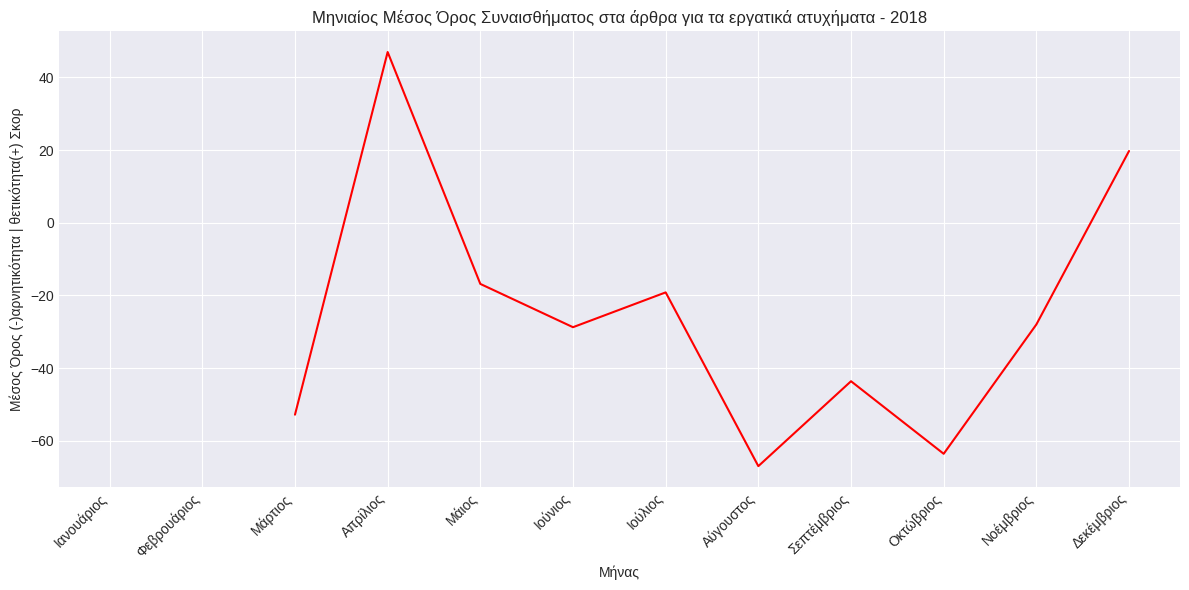

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# για 2018
df_2018 = short_combined_df.loc['2018']

df_2018['(-)αρνητικότητα | θετικότητα(+)'] = df_2018.positive*100//df_2018[['positive','negative']].sum(axis=1) - df_2018.negative*100//df_2018[['positive','negative']].sum(axis=1)


monthly_sentiment_2018 = df_2018['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()

greek_month_names = [
    'Ιανουάριος', 'Φεβρουάριος', 'Μάρτιος', 'Απρίλιος', 'Μάιος', 'Ιούνιος',
    'Ιούλιος', 'Αύγουστος', 'Σεπτέμβριος', 'Οκτώβριος', 'Νοέμβριος', 'Δεκέμβριος'
]


month_numbers = monthly_sentiment_2018.index.month


greek_month_labels = [greek_month_names[month - 1] for month in month_numbers]


plt.figure(figsize=(12, 6))
plt.plot(greek_month_labels, monthly_sentiment_2018.values, color='red')
plt.xlabel('Μήνας')
plt.ylabel('Μέσος Όρος (-)αρνητικότητα | θετικότητα(+) Σκορ')
plt.title('Μηνιαίος Μέσος Όρος Συναισθήματος στα άρθρα για τα εργατικά ατυχήματα - 2018')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()